## Análise de dados de vendas de Imóveis

### Carregando *packages*

In [19]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
import seaborn as sns

### Carregando base de dados

In [2]:
df = pd.read_csv("dados_vendas_imoveis.csv")
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.0,NaN,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.0,NaN,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.0,NaN,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.0,NaN,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.0,NaN,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46


### Explorando a base de dados

In [3]:
#Lista de variáveis
df.columns

Index(['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor', 'Valor_anuncio', 'Tipo_anuncio', 'Valor_mm', 'Valor_m2', 'rua',
       'cep', 'latitude', 'longitude', 'Point', 'setor_censo', 'Cod_setor',
       'Cod_Grandes Regiï¿½es', 'Nome_Grande_Regiao', 'Cod_UF', 'Nome_da_UF ',
       'Cod_meso', 'Nome_da_meso', 'Cod_micro', 'Nome_da_micro', 'Cod_RM',
       'Nome_da_RM', 'Cod_municipio', 'Nome_do_municipio', 'Cod_distrito',
       'Nome_do_distrito', 'Cod_subdistrito', 'Nome_do_subdistrito',
       'Cod_bairro', 'Nome_do_bairro', 'Situacao_setor', 'Tipo_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012'],
      dtype='object')

In [3]:
#Filtrando base de dados por variáveis de interesse
df2 = df.iloc[:, 0:8]
df2.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000


In [5]:
#Data types de cada variável
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        5605 non-null   object
 1   Bairro     5597 non-null   object
 2   Cidade     5605 non-null   object
 3   Metragem   5605 non-null   int64 
 4   Quartos    5605 non-null   int64 
 5   Banheiros  5605 non-null   int64 
 6   Vagas      5605 non-null   int64 
 7   Valor      5605 non-null   object
dtypes: int64(4), object(4)
memory usage: 350.4+ KB


In [7]:
#Número de valores únicos de cada variável
df2.nunique()

Rua          2914
Bairro        591
Cidade          1
Metragem      744
Quartos        11
Banheiros      13
Vagas          21
Valor         775
dtype: int64

In [6]:
#Verificando missings
df2.isna().sum()

Rua          0
Bairro       8
Cidade       0
Metragem     0
Quartos      0
Banheiros    0
Vagas        0
Valor        0
dtype: int64

### Tratando missing-Descobrindo as rua sem nome de bairros

In [9]:
#Separando nome da rua do número
df2[['Logradouro', 'Numero']] = df2['Rua'].str.split(',', 1, expand = True)
df2.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Logradouro,Numero
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,Avenida Itacira,255
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,Rua Aurelia Perez Alvarez,42
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,Rua Alba Valdez,None
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,Rua Tobias Barreto,195
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,Rua Graham Bell,None


In [10]:
rua_sem_bairro = list(df2.loc[df2['Bairro'].isna(), 'Logradouro'])
rua_sem_bairro

['Rua Vergueiro',
 'Rua Alvorada do Sul',
 'Rua Professor Eduardo Monteiro',
 'Avenida Comendador Adibo Ares',
 'Rua Alvorada do Sul',
 'Rua Professor Eduardo Monteiro',
 'Rua Professor Lúcio Martins Rodrigues',
 'Rua Pacobá']

In [11]:
#Descobrindo o nome do bairro correspondente a rua
bairro_correspondente = []
for rua in rua_sem_bairro:
    bairro = df2.loc[df2['Rua'] == rua, 'Bairro'].unique()
    if len(bairro) > 0:
        bairro_correspondente.append([rua, bairro[0]])
    else:
        bairro_correspondente.append([rua, 'Sem denominação'])
#Verificando
bairro_correspondente

[['Rua Vergueiro', 'Vila Firmiano Pinto'],
 ['Rua Alvorada do Sul', 'Jardim Guedala'],
 ['Rua Professor Eduardo Monteiro', 'Jardim Leonor'],
 ['Avenida Comendador Adibo Ares', 'Morumbi'],
 ['Rua Alvorada do Sul', 'Jardim Guedala'],
 ['Rua Professor Eduardo Monteiro', 'Jardim Leonor'],
 ['Rua Professor Lúcio Martins Rodrigues', 'Sem denominação'],
 ['Rua Pacobá', 'Jardim Panorama']]

In [12]:
#Fill missings
for bairro in bairro_correspondente[1]:
    df2.loc[df2['Bairro'].isna(), 'Bairro'] = bairro
df2.isna().sum()

Rua              0
Bairro           0
Cidade           0
Metragem         0
Quartos          0
Banheiros        0
Vagas            0
Valor            0
Logradouro       0
Numero        4427
dtype: int64

### Média da metragem de cada um dos bairros ordenada pelo número de anúncios

In [58]:
top15_metragem = (df2
                 .groupby('Bairro')
                 .agg({'Bairro': 'count', 'Metragem':'mean'})
                 .round({'Metragem': 2})
                 .rename(columns = {'Bairro': 'Nº de anúncios', 'Metragem': 'Metragem média'})
                 .sort_values(by = 'Nº de anúncios', ascending = False)
                 .head(15)
                )
top15_metragem

,Nº de anúncios,Metragem média
Bairro,,
Alto de Pinheiros,206,431.15
Jardim Guedala,176,635.11
Brooklin Paulista,143,302.43
Vila Mariana,142,234.42
Planalto Paulista,141,324.31
Pacaembu,138,500.11
Jardim Paulista,131,452.73
Vila Madalena,122,315.63
Campo Belo,98,280.32


In [52]:
def barhplot(y:str, data: pd.DataFrame, palette: str, title: str, figsize = (8, 10)):
    #Criando gradiente de cores para as barras
    cmap = plt.cm.get_cmap(palette)
    bar_colors = [mpc.to_hex(cmap(k)) for k in np.linspace(1, 0.5, len(data))]
    #Plot do gráfico de barras
    plt.figure(figsize = figsize)
    g = plt.barh(data.index, data[y], color = bar_colors)
    plt.gca().invert_yaxis()
    #Adicionando rótulos para os dados
    for bar in g.patches:
        value = bar.get_width()
        plt.text(s = f'{value}',
                 x = bar.get_x() + bar.get_width(),
                 y = bar.get_y() + bar.get_height()/2 ,
                 ha = 'right',
                 va = 'center',
                 fontweight = 'bold',
                 color = 'white')
    #Titulo
    plt.gca().set_title(f'{title}', fontweight = 'bold');
    #Removendo eixos
    for spine in ['top', 'bottom', 'left', 'right']:
        plt.gca().spines[spine].set_visible(False)
    #Removendo xticks
    plt.tick_params(axis = 'x', bottom = False, labelbottom = False)

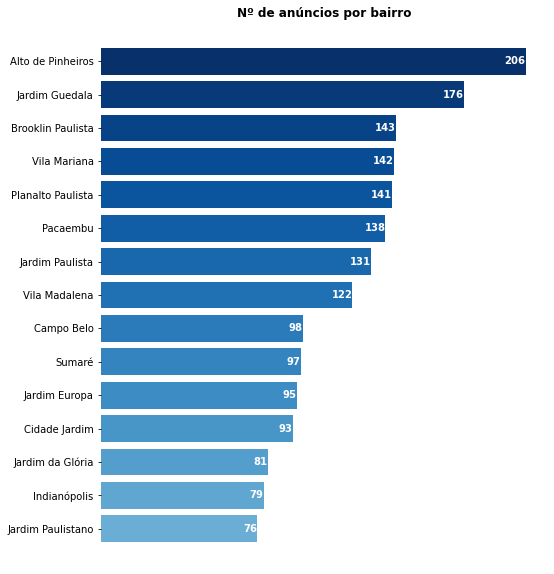

In [53]:
barhplot(y = 'Nº de anúncios', data = top15_metragem, palette = 'Blues', title = 'Nº de anúncios por bairro')

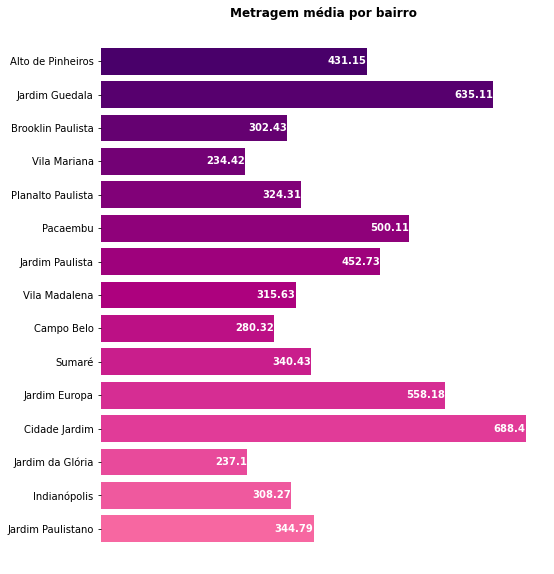

In [62]:
barhplot(y = 'Metragem média', data = top15_metragem, palette = 'RdPu', title = 'Metragem média por bairro')